# Darvesh Singh Dhillon

### How does someone's Socio-Economic Condition affect their Educational Adaptability? In particular, their Gender, Age, and Financial Condition.

I will be looking at the Age, Gender, and Financial Condition from the Adaptability Dataset. I will be dropping the rest of the columns so I can focus on just the 3 columns I want to compare with the adaptability levels. I will be creating plots with each variable against the adaptability level. This comparison will show which factor likely affects a person's adaptability level the most. 

In [7]:
#all the import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [8]:
#importing the dataset using a relative path
adapt = pd.read_csv("../data/raw/adaptability.csv")
adapt

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [9]:
#drop all extra columns
del adapt['Education Level']
del adapt['Institution Type']
del adapt['IT Student']
del adapt['Load-shedding']
del adapt['Internet Type']
del adapt['Network Type']
del adapt['Class Duration']
del adapt['Self Lms']
del adapt['Device']

In [10]:
adapt.head()

,Gender,Age,Location,Financial Condition,Adaptivity Level
0,Boy,21-25,Yes,Mid,Moderate
1,Girl,21-25,Yes,Mid,Moderate
2,Girl,16-20,Yes,Mid,Moderate
3,Girl,11-15,Yes,Mid,Moderate
4,Girl,16-20,Yes,Poor,Low


In [11]:
adapt.shape

(1205, 5)

In [12]:
adapt.columns

Index(['Gender', 'Age', 'Location', 'Financial Condition', 'Adaptivity Level'], dtype='object')

In [13]:
adapt.nunique()

Gender                 2
Age                    6
Location               2
Financial Condition    3
Adaptivity Level       3
dtype: int64

In [14]:
adapt.apply(lambda col: col.unique())

Gender                                             [Boy, Girl]
Age                    [21-25, 16-20, 11-15, 26-30, 6-10, 1-5]
Location                                             [Yes, No]
Financial Condition                          [Mid, Poor, Rich]
Adaptivity Level                         [Moderate, Low, High]
dtype: object

##### The location is based on whether the student is located in town or not.
##### The LMS refers to whether the institution has its own Learning Management System (LMS) such as Canvas, Moodle, etc.

In [15]:
adapt.describe()

,Gender,Age,Location,Financial Condition,Adaptivity Level
count,1205,1205,1205,1205,1205
unique,2,6,2,3,3
top,Boy,21-25,Yes,Mid,Moderate
freq,663,374,935,878,625


In [16]:
#saving the processed data
adapt.to_csv("../data/processed/analysis1.csv")

___
## We are now ready to plot the data
___

# Research Area 1:  Gender VS Adaptivity Level

In [17]:
plot1 = adapt[['Adaptivity Level','Gender']]
plot1

,Adaptivity Level,Gender
0,Moderate,Boy
1,Moderate,Girl
2,Moderate,Girl
3,Moderate,Girl
4,Low,Girl
...,...,...
1200,Low,Girl
1201,Moderate,Girl
1202,Moderate,Boy
1203,Low,Girl


In [18]:
adaptivityGendered = plot1.value_counts().reset_index()
adaptivityGendered.rename(columns={0: 'Count'}, inplace=True)
adaptivityGendered


,Adaptivity Level,Gender,Count
0,Moderate,Boy,347
1,Moderate,Girl,278
2,Low,Boy,245
3,Low,Girl,235
4,High,Boy,71
5,High,Girl,29


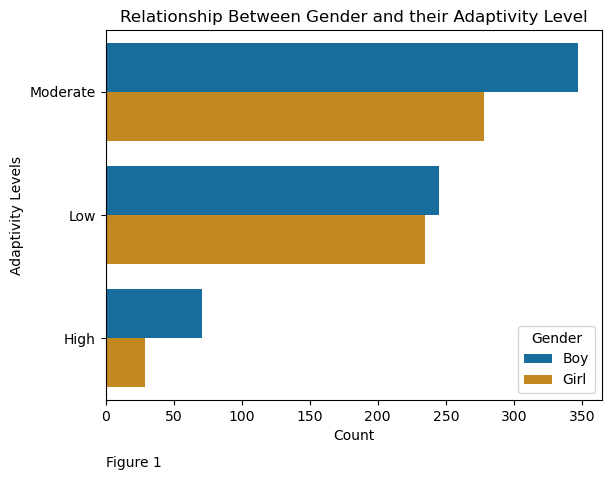

In [19]:
sns.countplot(data = plot1, y='Adaptivity Level', hue = "Gender", palette='colorblind')
plt.xlabel('Count')
plt.ylabel('Adaptivity Levels')
plt.title('Relationship Between Gender and their Adaptivity Level')
plt.text(0.17, -0.03, 'Figure 1', ha='center', fontsize=10, transform=plt.gcf().transFigure)
plt.show(close=None, block=None)

### Observations
As we can see from this plot, Boys have a higher adaptability level on average
##### **Percent increases:**
**High** - Boys are **144.83%** more adaptive in this range

**Moderate** - Boys are **24.82%** more adaptive in this range

**Low** - Boys are **4.26%** more adaptive in this range

# Research Area 2:  Age VS Adaptivity

In [20]:
plot2 = adapt[['Adaptivity Level','Age', 'Gender']]
plot2

,Adaptivity Level,Age,Gender
0,Moderate,21-25,Boy
1,Moderate,21-25,Girl
2,Moderate,16-20,Girl
3,Moderate,11-15,Girl
4,Low,16-20,Girl
...,...,...,...
1200,Low,16-20,Girl
1201,Moderate,16-20,Girl
1202,Moderate,11-15,Boy
1203,Low,16-20,Girl


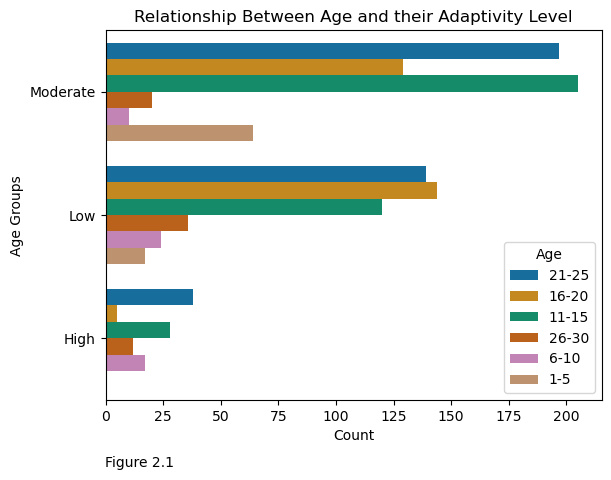

In [21]:
sns.countplot(data = plot2, y='Adaptivity Level', hue = "Age", palette='colorblind')
plt.xlabel('Count')
plt.ylabel('Age Groups')
plt.title('Relationship Between Age and their Adaptivity Level')
plt.text(0.178, -0.03, 'Figure 2.1', ha='center', fontsize=10, transform=plt.gcf().transFigure)
plt.show(close=None, block=None)

In [28]:
# this code changes the age ranges to ints to give you a better understanding.
plot3 = plot2.copy()
plot3['Age'] = plot3['Age'].apply(convert_age_to_int)

### Observations
As we can see from this plot, Age ranges 11-15 and 21-25 have the best Adaptivity Level in both the High and Moderate categories. This could be because the age range between the two is when hormones start acting up in teenagers, causing them to be more emotional and unstable in mood compared to many other age ranges.

We can also see that the age group 1-5 does not have any in the high adaptivity. This can also be due to human developement and at these young ages, children can be very unstable and are still learning how to control their wants from their needs.

Now that we have seen how the ages reflect on the adaptivity levels of students, lets compare it back to gender.

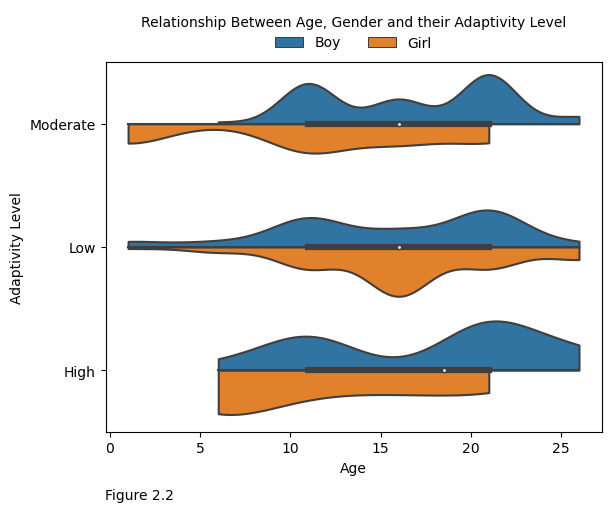

In [29]:
#creating a violin plot to show how gender also plays a role
ax = sns.violinplot(data=plot3, x='Age', y='Adaptivity Level', hue='Gender', split=True, cut=0)
plt.xlabel('Age')
plt.ylabel('Adaptivity Level')
sns.move_legend(ax,"lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Relationship Between Age, Gender and their Adaptivity Level', frameon=False)
plt.text(0.178, -0.03, 'Figure 2.2', ha='center', fontsize=10, transform=plt.gcf().transFigure)
plt.show(close=None, block=None)

As we can see from this plot girls at a younger age have a higher adaptivity level, but when we look at the age ranges from the previous graph, girls have a better adaptivity level compared to boys in the 11-15 range and we are not able to compare girls to boys in the 21-25 age range because we do not have enough data in our dataset. We can also see that girls tend to have a lower Adaptivity Level in their teens compared to boys.

# Research Area 3:  Financial Condition VS Adaptivity

In [25]:
plot4 = adapt[['Adaptivity Level','Financial Condition']]
plot4

,Adaptivity Level,Financial Condition
0,Moderate,Mid
1,Moderate,Mid
2,Moderate,Mid
3,Moderate,Mid
4,Low,Poor
...,...,...
1200,Low,Mid
1201,Moderate,Mid
1202,Moderate,Mid
1203,Low,Mid


In [ ]:
adaptivityFC = plot4.value_counts().reset_index()
adaptivityFC.rename(columns={0: 'Count'}, inplace=True)
adaptivityFC


,Adaptivity Level,Financial Condition,Count
0,Moderate,Mid,501
1,Low,Mid,341
2,Low,Poor,129
3,Moderate,Poor,91
4,High,Rich,42
5,High,Mid,36
6,Moderate,Rich,33
7,High,Poor,22
8,Low,Rich,10


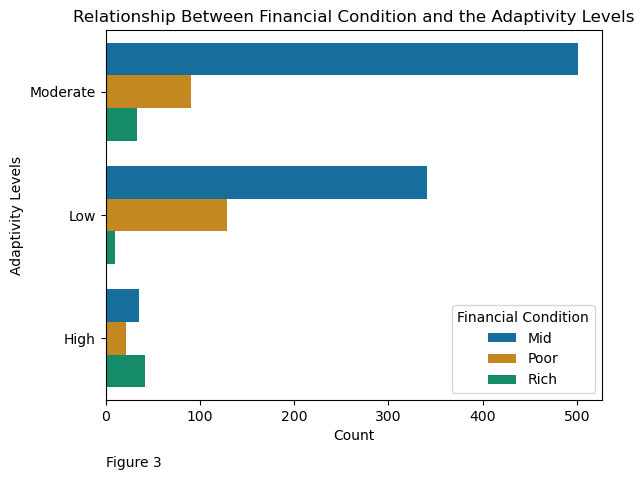

In [26]:
sns.countplot(data=plot4, y='Adaptivity Level',
              hue="Financial Condition", palette='colorblind')

plt.xlabel('Count')
plt.ylabel('Adaptivity Levels')
plt.title('Relationship Between Financial Condition and the Adaptivity Levels')
plt.text(0.17, -0.03, 'Figure 3', ha='center',
         fontsize=10, transform=plt.gcf().transFigure)
plt.show(close=None, block=None)


### Observations
As we can see from this plot, Middle class people are able to lowly, and moderately adapt better than both poor and rich. Most rich people have a higher adaptivity level, and this can be because of the resources available to them compared to the middle class and poor people. However, We do not have enough data to conclude that being rich certainly gives you a better adaptivity level because as we can see, there are only 85 rich people in the survey compared to the hundreds of middle class and poor financial condition families.



Looking at the complete results of out data wrangling, we can conclude that most middle class males who are 20 years of age or older are more likely to be able to adapt to new scenarios such as online learning when forced to do so.



In [27]:
#functions used in the data cleaning/wrangling process
def convert_age_to_int(x):
    """Converts the age range (x) to an integer.

    Args:
        x (String): Age range to be converted

    Returns:
        int: returns an integer of the first age in the age range
    """
    if x == "1-5":
        return 1
    elif x == "6-10":
        return 6
    elif x == "11-15":
        return 11
    elif x == "16-20":
        return 16
    elif x == "21-25":
        return 21
    elif x == "26-30":
        return 26
    else:
        print("error")
